In [22]:
import os
import cooler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Plot Micro-C map

### Hong et al. (bioRxiv): https://doi.org/10.1101/2025.05.06.650874

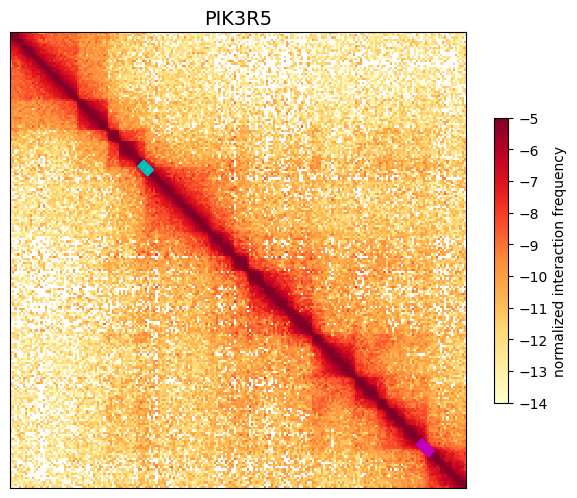

In [51]:
# Define parameters
title = 'PIK3R5'
resolution = 500
chromosome = 'chr17'
start = 8870000
end = 8975000
vmax = -5
vmin = -14

cool_file = cooler.Cooler(f'GM12878_microc.mcool::/resolutions/{resolution}')
matrix = cool_file.matrix(balance=True, sparse=True).fetch(f'{chromosome}:{start}-{end}').toarray()
matrix = np.nan_to_num(matrix)

fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)
ax.set_title(title, fontsize = 14)
im = ax.matshow(np.log2(matrix), cmap='YlOrRd', vmax = vmax, vmin = vmin)

plt.plot([(8900578-start)/resolution, (8901457-start)/resolution], [(8900578-start)/resolution, (8901457-start)/resolution], color = 'c', lw = 7)
plt.plot([(8964717-start)/resolution, (8966218-start)/resolution], [(8964717-start)/resolution, (8966218-start)/resolution], color = 'm', lw = 7)

fig.colorbar(im, shrink = 0.5, label = 'normalized interaction frequency')
plt.xticks([], [])
plt.yticks([], [])

plt.tight_layout()
plt.savefig(f'/DATA/users/m.magnitov/hap_phen/figures/links_microc_PIK3R5_{resolution}.pdf', bbox_inches = 'tight')
plt.show()